<a href="https://colab.research.google.com/github/AFinch21/COVID-SEIR-Simulation/blob/main/COVID_19_SEIR_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No handles with labels found to put in legend.


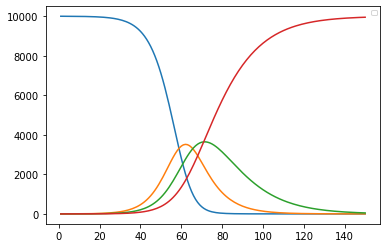

Number of Days in Simulation: 150
Total Population: 10000
Infected/Susceptible Contact Rate/Day: 1
Infectivity: 0.6
Average Incubation Time: 10
Average Illness Time: 15


In [8]:
#ImPoRt tEh LiBooRaRieS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#input parameters for your COVID-19 fueled nightmare
SimulationLength = 150
SimulationDays = range(0,SimulationLength)
TotalPopulation = 10000
ContactRateInfectious = 1
Infectivity = 0.6
AverageIncubationTime = 10
AverageIllnessDuration = 15
data = []

def SystemDynamicSEIR():
    Susceptible = TotalPopulation - 1
    Exposed = 0
    Infectious = 1
    Recovered = 0
    SimulationDayNum = 0
    for x in SimulationDays:
        SimulationDayNum += 1
        ExposedFlowRate = Infectious*ContactRateInfectious*Infectivity*Susceptible/TotalPopulation
        InfectiousFlowRate = Exposed/AverageIncubationTime
        RecoveredFlowRate = Infectious/AverageIllnessDuration
        
        Susceptible -= ExposedFlowRate
        Exposed += ExposedFlowRate
        Exposed -= InfectiousFlowRate
        Infectious += InfectiousFlowRate
        Infectious -= RecoveredFlowRate
        Recovered += RecoveredFlowRate
        
        
        data.append([SimulationDayNum, Susceptible, Exposed, Infectious, Recovered])

SystemDynamicSEIR()
simData = pd.DataFrame(data, columns = ['Simulation Day', 'Susceptible', 'Exposed', 'Infectious', 'Recovered'])
simData

plt.plot(simData['Simulation Day'], simData['Susceptible'])
plt.plot(simData['Simulation Day'], simData['Exposed'])
plt.plot(simData['Simulation Day'], simData['Infectious'])
plt.plot(simData['Simulation Day'], simData['Recovered'])
plt.legend(fontsize = 'x-small')
plt.show()

print("Number of Days in Simulation: " + str(SimulationLength))
print("Total Population: " + str(TotalPopulation))
print("Infected/Susceptible Contact Rate/Day: " + str(ContactRateInfectious))
print("Infectivity: " + str(Infectivity))
print("Average Incubation Time: " + str(AverageIncubationTime))
print("Average Illness Time: " + str(AverageIllnessDuration))
